# Performing Gradient Descent in Regression

using gradient descent in linear regression and find the optimal parameter.


The equation of a simple linear regression can be expressed as:

$$ \hat{y} = mx + b  -- (1)$$

Thus, we have two parameters $m$ and $b$. We will see how can we use gradient descent and find the optimal values for these two parameters $m$ and $b$.


# Import the Libraries

Import the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Prepare the dataset

We generate some random data points<br>
with 500 rows and 2 columns (x and y) <br>
and use for training:

In [16]:
# random dataset
data = np.random.randn(500, 2)

In [3]:
data[0]

array([1.09700917, 0.19882684])

First column indicates the $x$ value:

In [4]:
data[0,0]

np.float64(1.097009165537061)

Second column indicates the $y$ value:

In [5]:
data[0,1]

np.float64(0.19882684243462315)

The equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an array called theta. First, we initialize theta with zeros as shown below:

In [6]:
theta = np.zeros(2)

In [7]:
theta

array([0., 0.])

theta[0] represents the value of $m$ and theta[1] represents the value of $b$

# Loss Function


In [8]:
def loss_function(data,theta):

    #get m and b
    m = theta[0]
    b = theta[1]

    loss = 0

    #for each iteration
    for i in range(0, len(data)):

        #get x and y
        x = data[i, 0]
        y = data[i, 1]

        #predict the value of y
        y_hat = (m*x + b)

        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)

    #mean sqaured error
    mse = loss / float(len(data))

    return mse

In [9]:
loss_function(data, theta)

np.float64(0.9739780612211567)

# Gradients of Loss Function

We define a function called compute_gradients which takes the data and parameter theta as an input and returns the computed gradients:

In [10]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)

    #total number of data points
    N = float(len(data))

    m = theta[0]
    b = theta[1]

    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]

        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))

        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [11]:
compute_gradients(data,theta)

array([0.00021881, 0.00011612])

Set the number of iterations:

In [12]:
num_iterations = 50000

Define the learning rate:

In [13]:
lr = 1e-2

Define a list called loss for storing the loss on every iterations:

In [14]:
loss = []

On each iteration, calculate gradients and update the gradients according to our paramater update rule (7):

In [15]:
theta = np.zeros(2)

for t in range(num_iterations):

    #compute gradients
    gradients = compute_gradients(data, theta)

    #update parameter
    theta = theta - (lr*gradients)

    #store the loss
    loss.append(loss_function(data,theta))

The below plot shows how the loss(cost) decreases over the training iterations:

Text(0.5, 1.0, 'Gradient Descent')

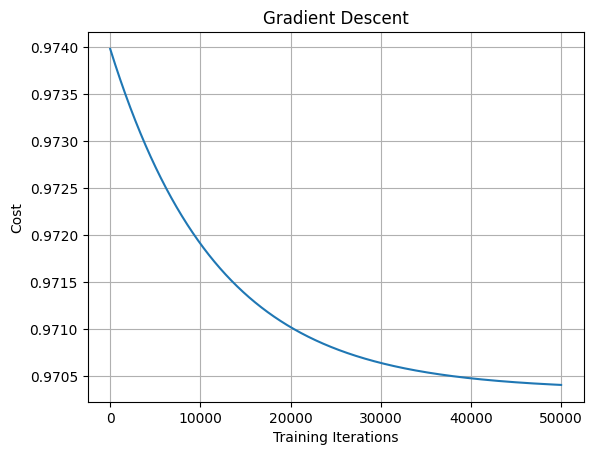

In [17]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')